# 1. viết chương trình biến đổi ảnh

## 1.1 chọn đối tượng trong ảnh 

(1427, 2100, 3)


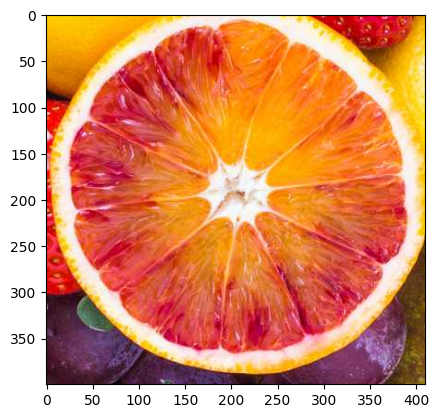

In [6]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
bmg = data[800:1200, 570:980]
print(data.shape)

iio.imsave('orange.jpg', bmg)
plt.imshow(bmg)
plt.show()


## 1.2 tịnh  tiến đơn

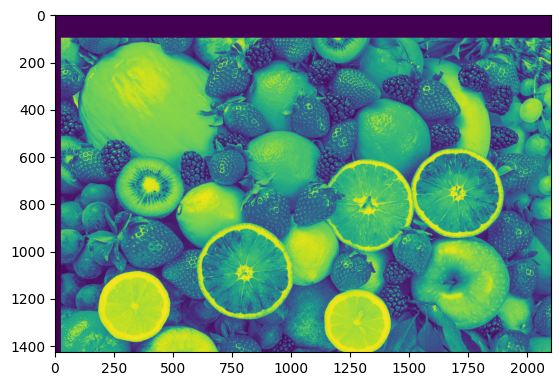

In [10]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg',mode='L')
bdata = nd.shift(data, (100, 25))

plt.imshow(bdata)
plt.show()


## 1.3 thay đổi kích thước ảnh

(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


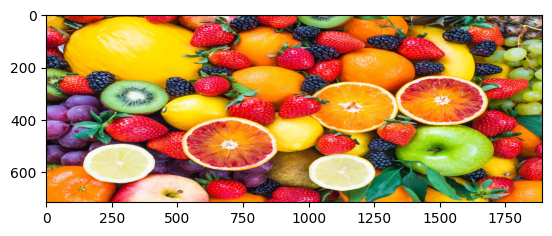

In [11]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)
bdata = nd.zoom(data, 2)
print(bdata.shape)
data2 = nd.zoom(data, (2, 2, 1))
print(data2.shape)
data3 = nd.zoom(data, (0.5, 0.9, 1))
plt.imshow(data3)
plt.show()


## 1.4 xoay ảnh

(1427, 2100, 3)


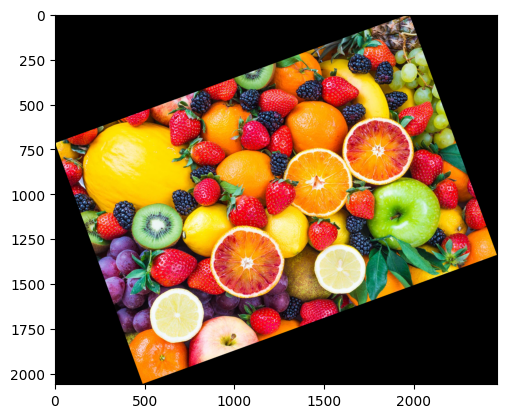

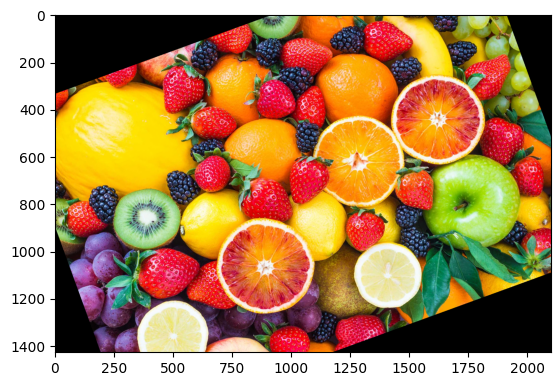

In [12]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print(data.shape)

d1 = nd.rotate(data, 20)
plt.imshow(d1)
plt.show()

d2 = nd.rotate(data, 20, reshape=False)
plt.imshow(d2)
plt.show()


## 1.5 Dilation và Erosion

(309, 515)


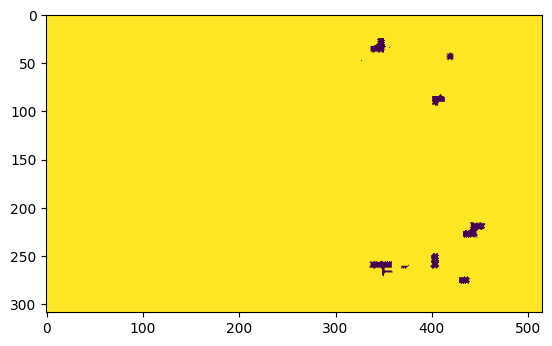

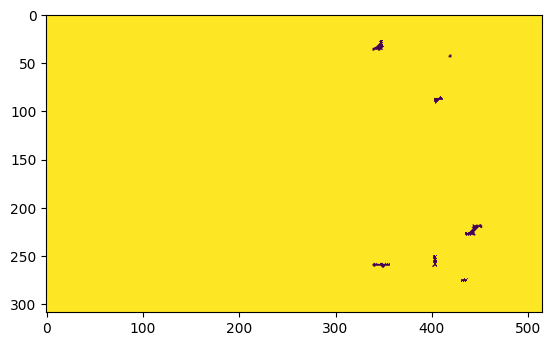

In [14]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('world_cup.jpg',mode='L')
print(data.shape)

d1 = nd.binary_dilation(data)
plt.imshow(d1)
plt.show()

d2 = nd.binary_dilation(data, iterations=3)
plt.imshow(d2)
plt.show()


## 1.6 Coordinate Mapping

(309, 515)


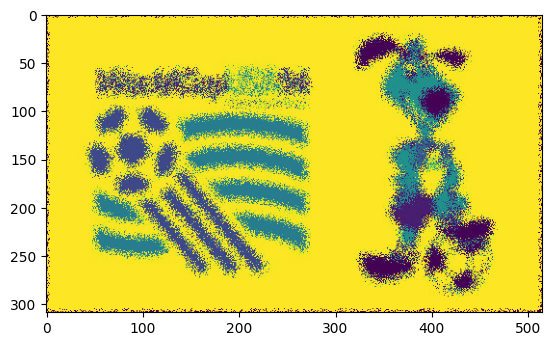

In [15]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('world_cup.jpg',mode='L')
print(data.shape)
V, H = data.shape

M = np.indices((V, H))

d = 5
q = 2 * d * np.random.ranf(M.shape) - d
mp = (M + q).astype(int)
dl = nd.map_coordinates(data, mp)

plt.imshow(dl)
plt.show()


## 1.7 biến đổi chung

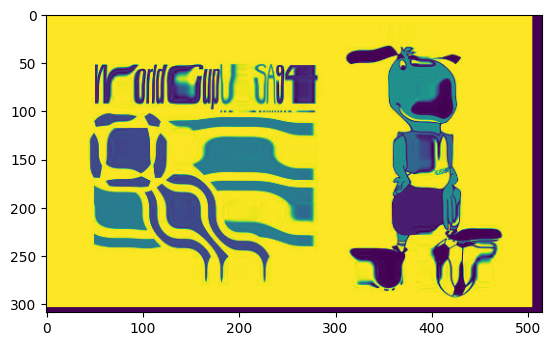

In [17]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

def GeoFun(outcoord):
    a = 10 * np.cos(outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1]/10.0) + outcoord[1]
    return a, b

data = iio.imread('world_cup.jpg',mode='L')

d1 = nd.geometric_transform(data, GeoFun)
plt.imshow(d1)
plt.show()


# bài tập tăng cường

## câu 1

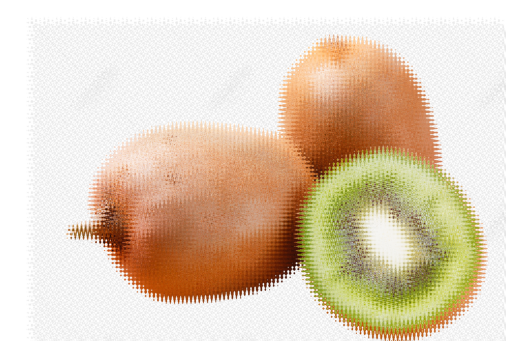

In [20]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
from scipy.ndimage import map_coordinates
from PIL import Image

data = iio.imread('kiwi.jpg')

h, w, c = data.shape
translated = np.ones_like(data) * 255
translated[30:h, 50:w] = data[0:h-30, 0:w-50]

rows, cols = translated.shape[:2]
x, y = np.meshgrid(np.arange(cols), np.arange(rows))

amplitude = 10
frequency = 0.1
x_wave = x + amplitude * np.sin(2 * np.pi * y * frequency)
y_wave = y + amplitude * np.sin(2 * np.pi * x * frequency)

warped = np.zeros_like(translated)
for i in range(3):
    warped[:, :, i] = map_coordinates(translated[:, :, i], [y_wave, x_wave], order=1, mode='reflect')

warped_rgb = warped[:, :, :3]
Image.fromarray(warped_rgb.astype(np.uint8)).save('kiwi_wave.jpg')

plt.imshow(warped_rgb.astype(np.uint8))
plt.axis('off')
plt.show()


## câu 2

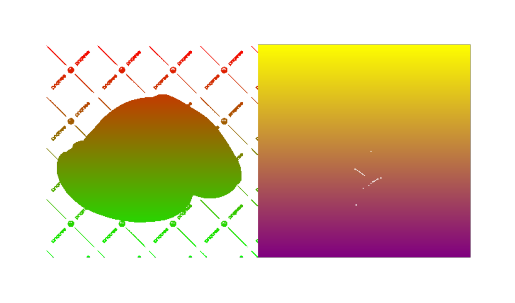

In [22]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
from PIL import Image

papaya = iio.imread('papaya.jpg')
watermelon = iio.imread('watermelon.jpg')

papaya = np.array(Image.fromarray(papaya).resize((300, 300)))
watermelon = np.array(Image.fromarray(watermelon).resize((300, 300)))

def apply_gradient(image, start_color, end_color):
    h, w, _ = image.shape
    gradient = np.linspace(start_color, end_color, h).astype(np.uint8)
    gradient = np.tile(gradient[:, None, :], (1, w, 1))
    alpha = (np.mean(image, axis=2) > 20).astype(np.uint8)
    alpha = np.expand_dims(alpha, axis=2)
    rgb = gradient * alpha + 255 * (1 - alpha)
    rgba = np.concatenate((rgb, alpha * 255), axis=2)
    return rgba.astype(np.uint8)

papaya_grad = apply_gradient(papaya, [255, 0, 0], [0, 255, 0])
watermelon_grad = apply_gradient(watermelon, [255, 255, 0], [128, 0, 128])

canvas = np.zeros((400, 700, 4), dtype=np.uint8)
canvas[50:350, 50:350] = papaya_grad
canvas[50:350, 350:650] = watermelon_grad

iio.imsave('fruit_combo.png', canvas)

plt.imshow(canvas)
plt.axis('off')
plt.show()


## câu 3

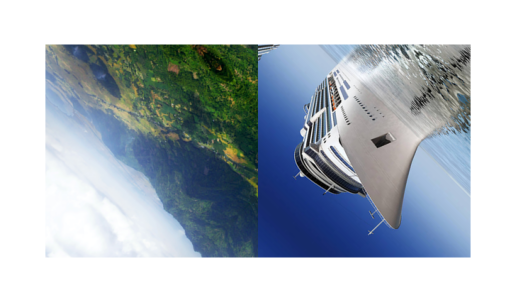

In [23]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
from scipy.ndimage import rotate
from PIL import Image

mountain = iio.imread('mountain.jpg')
boat = iio.imread('boat.jpg')

mountain = np.array(Image.fromarray(mountain).resize((300, 300)))
boat = np.array(Image.fromarray(boat).resize((300, 300)))

mountain_rot = rotate(mountain, 45, reshape=False, mode='reflect')
boat_rot = rotate(boat, 45, reshape=False, mode='reflect')

mountain_mirror = np.flipud(mountain_rot)
boat_mirror = np.flipud(boat_rot)

canvas = np.ones((400, 700, 3), dtype=np.uint8) * 255
canvas[50:350, 50:350] = mountain_mirror
canvas[50:350, 350:650] = boat_mirror

iio.imsave('mountain_boat_mirror.jpg', canvas)

plt.imshow(canvas)
plt.axis('off')
plt.show()


## câu 4

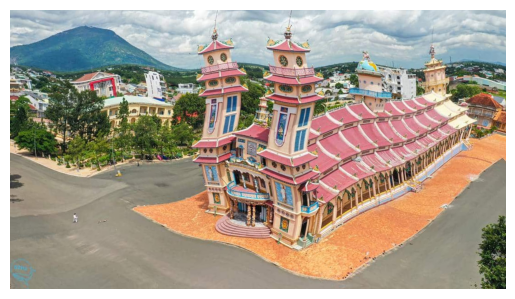

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
from scipy.ndimage import map_coordinates
from PIL import Image

data = iio.imread('pagoda.jpg')
data = np.array(Image.fromarray(data).resize((data.shape[1]*5, data.shape[0]*5)))

h, w, _ = data.shape
x, y = np.meshgrid(np.arange(w), np.arange(h))

warp_strength = 40
frequency = 0.0008
x_new = x + warp_strength * np.sin(2 * np.pi * y * frequency)
y_new = y + warp_strength * np.cos(2 * np.pi * x * frequency)

warped = np.zeros_like(data)
for i in range(3):
    warped[:, :, i] = map_coordinates(data[:, :, i], [y_new, x_new], order=1, mode='reflect')

iio.imsave('pagoda_warped.jpg', warped.astype(np.uint8))

plt.imshow(warped)
plt.axis('off')
plt.show()


## câu 5

Chọn ảnh:
1. image1.jpg
2. image2.jpg
3. image3.jpg
Chọn phép biến đổi:
1. Tịnh tiến
2. Xoay
3. Phóng to / Thu nhỏ
4. Làm mờ Gaussian
5. Biến đổi sóng


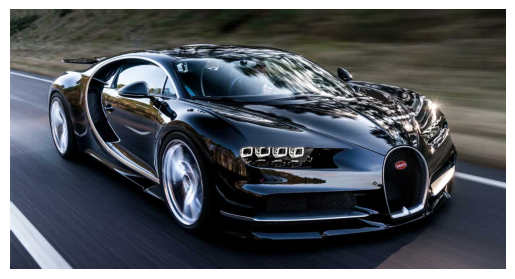

In [25]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
from scipy.ndimage import shift, rotate, zoom, gaussian_filter, map_coordinates
from PIL import Image

options = ['image1.jpg', 'image2.jpg', 'image3.jpg']
print("Chọn ảnh:")
for i, name in enumerate(options):
    print(f"{i+1}. {name}")
choice = int(input("Nhập số (1-3): "))
data = iio.imread(options[choice - 1])

print("Chọn phép biến đổi:")
print("1. Tịnh tiến")
print("2. Xoay")
print("3. Phóng to / Thu nhỏ")
print("4. Làm mờ Gaussian")
print("5. Biến đổi sóng")
mode = int(input("Nhập số (1-5): "))

if mode == 1:
    dx = int(input("Nhập số pixel theo trục x: "))
    dy = int(input("Nhập số pixel theo trục y: "))
    result = shift(data, shift=(dy, dx, 0), mode='reflect')

elif mode == 2:
    angle = float(input("Nhập góc xoay: "))
    reshape_flag = input("reshape? (y/n): ").lower() == 'y'
    result = rotate(data, angle=angle, reshape=reshape_flag, mode='reflect')

elif mode == 3:
    factor = float(input("Nhập hệ số zoom: "))
    result = zoom(data, zoom=(factor, factor, 1), order=1)

elif mode == 4:
    sigma = float(input("Nhập giá trị sigma: "))
    result = gaussian_filter(data, sigma=(sigma, sigma, 0))

elif mode == 5:
    amp = float(input("Nhập biên độ sóng: "))
    h, w, _ = data.shape
    x, y = np.meshgrid(np.arange(w), np.arange(h))
    x_wave = x + amp * np.sin(2 * np.pi * y / 100)
    y_wave = y + amp * np.sin(2 * np.pi * x / 100)
    result = np.zeros_like(data)
    for i in range(3):
        result[:, :, i] = map_coordinates(data[:, :, i], [y_wave, x_wave], order=1, mode='reflect')

else:
    result = data

iio.imsave('transformed_image.jpg', result.astype(np.uint8))

plt.imshow(result)
plt.axis('off')
plt.show()
